#                                  Reinforcement Learning
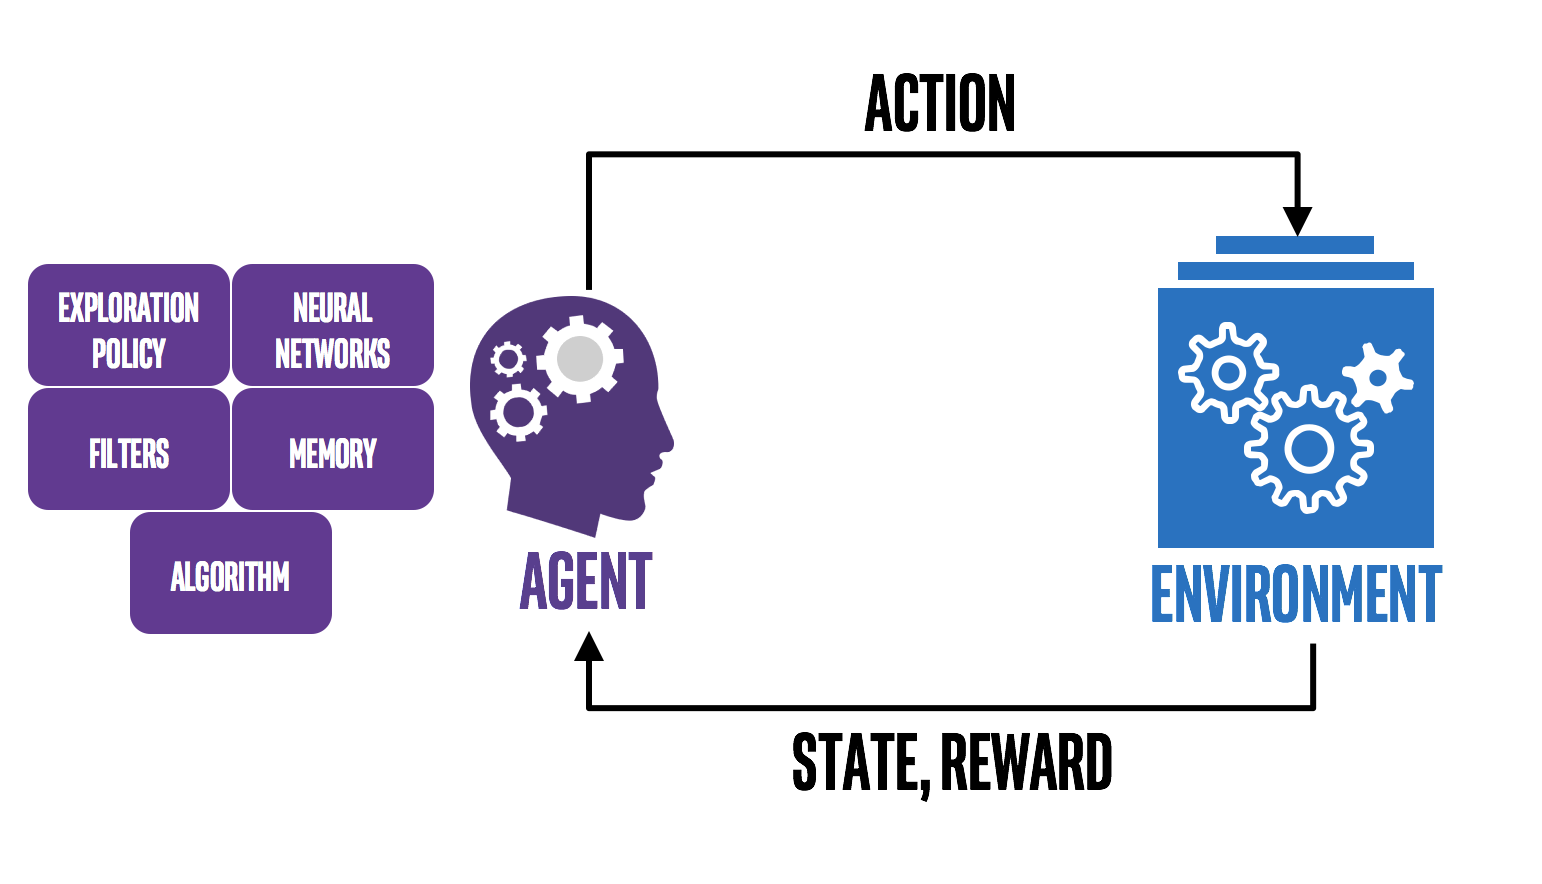

### Reinforcement Learning is un subcampo de machine learning intentará hacer aprender a un agente en como escoger una accion de su espacio de accion  basándose en un esquema de “premios y castigos” -cómo con el perro de Pablov- en un entorno en donde hay que tomar acciones y que está afectado por múltiples variables que cambian con el tiempo.

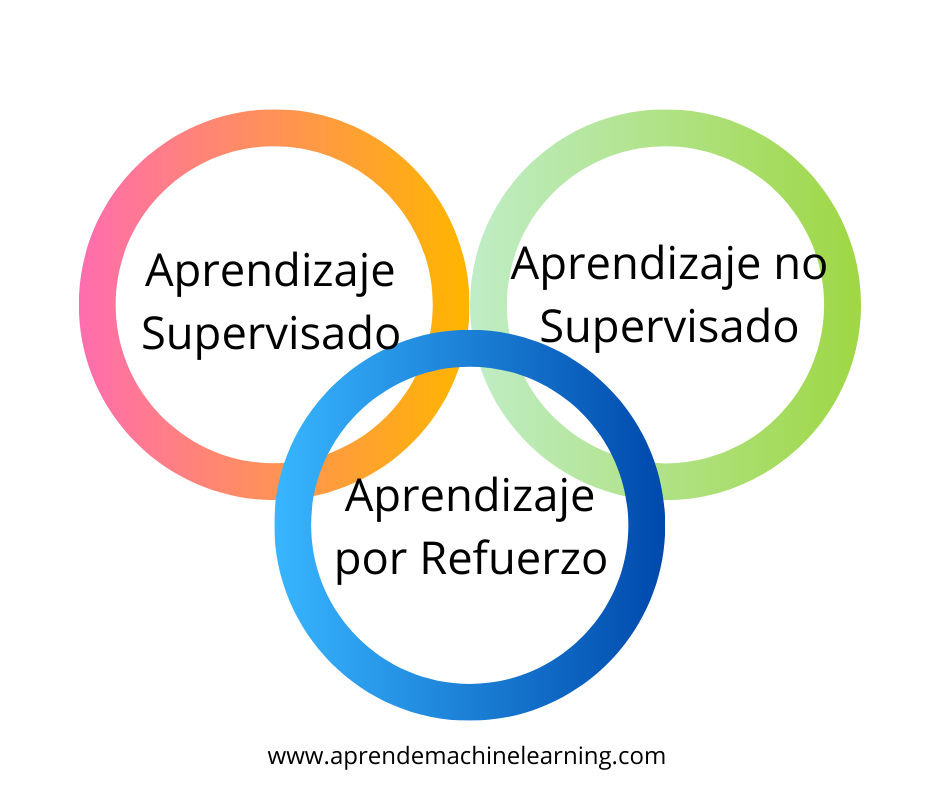

# Diferencias con los otros modelos de ML

#### En los modelos de Aprendizaje Supervisado (o no supervisado) como redes neuronales, árboles, knn, etc, se intenta “minimizar la función coste”, reducir el error.

#### En cambio en el RL se intenta “maximizar la recompensa“. Y esto puede ser, a pesar de a veces cometer errores ó de no ser óptimos.

## Componentes del RL



#### El Agente: 
Será nuestro modelo que queremos entrenar y que aprenda a tomar decisiones.
#### Ambiente:
Será el entorno en donde interactúa y “se mueve” el agente. El ambiente contiene las limitaciones y reglas posibles a cada momento.
### Entre ellos hay una relación que se retroalimenta y cuenta con los siguientes nexos:

#### Acción:
Las posibles acciones que puede tomar en un momento determinado el Agente.
#### Estado (del ambiente):  
Son los indicadores del ambiente de cómo están los diversos elementos que lo componen en ese momento.
#### Recompensas (ó castigos!):
A raíz de cada acción tomada por el Agente, podremos obtener un premio ó una penalización que orientarán al Agente en si lo está haciendo bien ó mal.

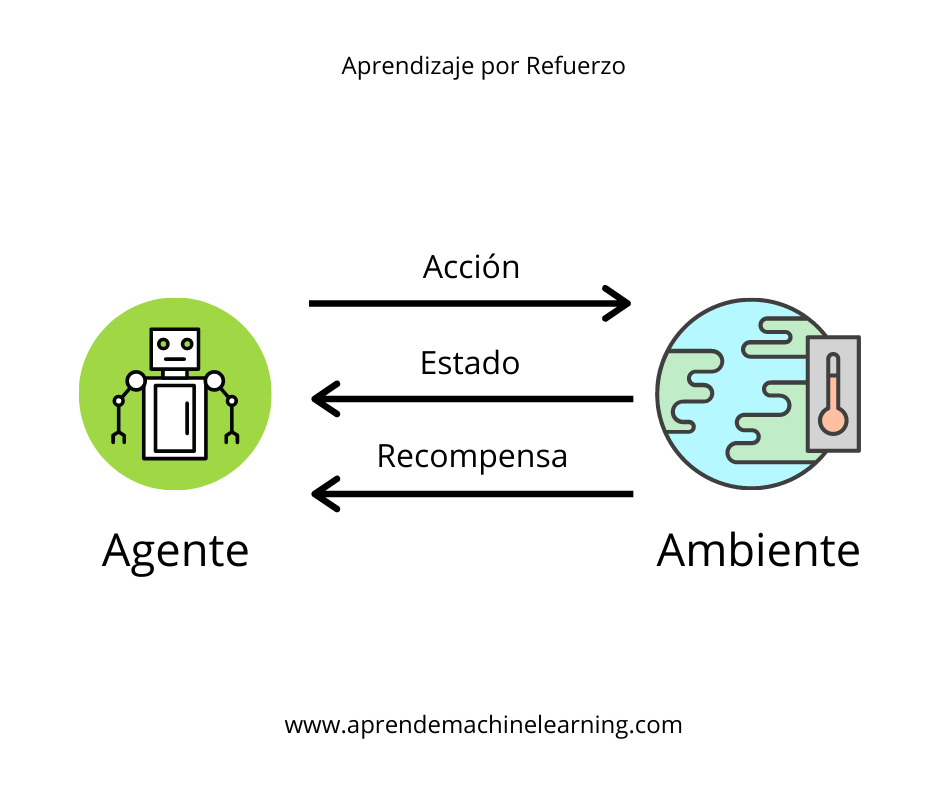

En un primer momento, el agente recibe un estado inicial y toma una acción con lo cual influye é interviene en el ambiente. Esto está muy bien, pues es muy cierto que cuando tomamos decisiones en el mundo real lo estamos modificando, ¿no?. Y esa decisión tendrá sus consecuencias: en la siguiente iteración el ambiente devolverá al agente el nuevo estado y la recompensa obtenida. Si la recompensa es positiva estaremos reforzando ese comportamiento para el futuro. En cambio si la recompensa es negativa lo estaremos penalizando, para que ante la misma situación el agente actúe de manera distinta. El esquema en el que se apoya el Reinforcement Learning es en el de Proceso de Decisión de Markov.

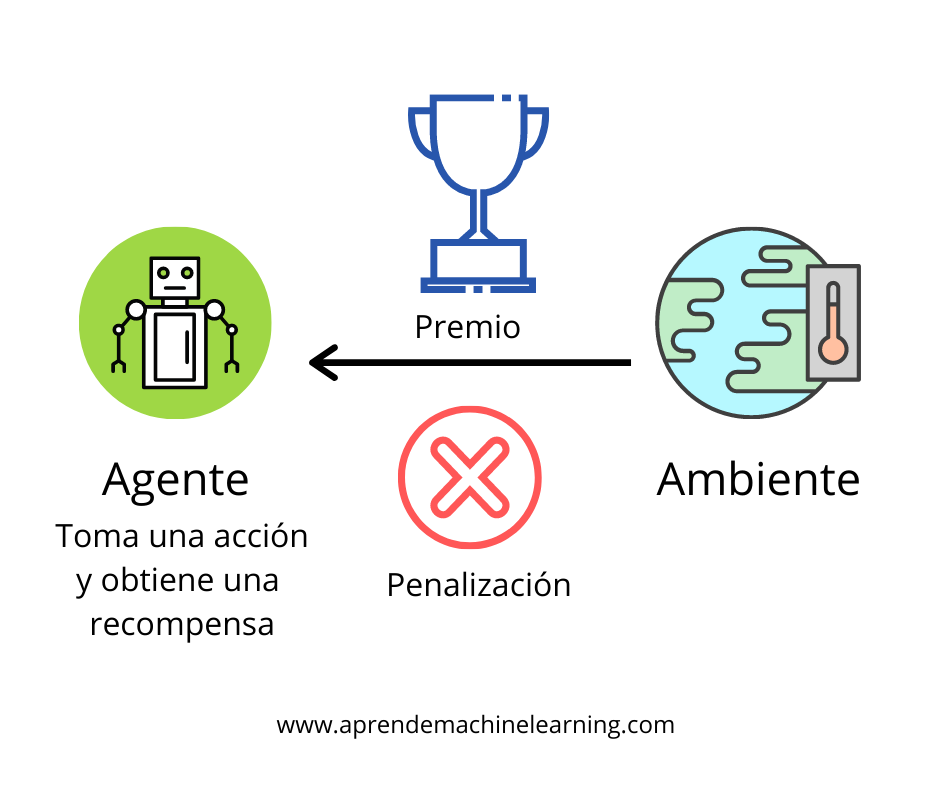

Supongamos que la acción “A” nos recompensa con 100 puntos. El Agente podría pensar “genial, voy a elegir A nuevamente para obtener 100 puntos” y puede que el algoritmo se estanque en una única acción y nunca logre concretar el objetivo global que queremos lograr.

Es decir que tenemos que lograr un equilibrio entre “explorar lo desconocido y explotar los recursos” en el ambiente. Eso es conocido como el dilema de exploración/explotación.

El agente explorará el ambiente e irá aprendiendo “cómo moverse” y cómo ganar recompensas (y evitar las penalizaciones). Al final almacenará el conocimiento en unas normas también llamadas “políticas“.

Pero… debo decir que es probable que el agente “muera” ó pierda la partida las primeras… ¿mil veces? Con esto me refiero a que deberemos entrenar miles y miles de veces al agente para que cometa errores y aciertos y pueda crear sus políticas hasta ser un buen Agente.

 # Q-Learning

#### Políticas:
Es una tabla (aunque puede tener n-dimensiones) que le indicará al modelo “como actuar” en cada estado.
#### Acciones:
Las diversas elecciones que puede hacer el agente en cada estado
#### Recompensas: 
Si sumamos ó restamos puntaje con la acción tomada
#### Comportamiento “avaro” (greedy en inglés) del agente.
Es decir, si se dejará llevar por grandes recompensas inmediatas, ó irá explorando y valorando las riquezas a largo plazo

El objetivo principal al entrenar nuestro modelo a través de las simulaciones será ir “rellenando” la tabla de Políticas de manera que las decisiones que vaya tomando nuestro agente obtengan “la mayor recompensa” a la vez que avanzamos y no nos quedamos estancados, es decir, pudiendo cumplir el objetivo global (ó final) que deseamos alcanzar.
A la política la llamaremos “Q”


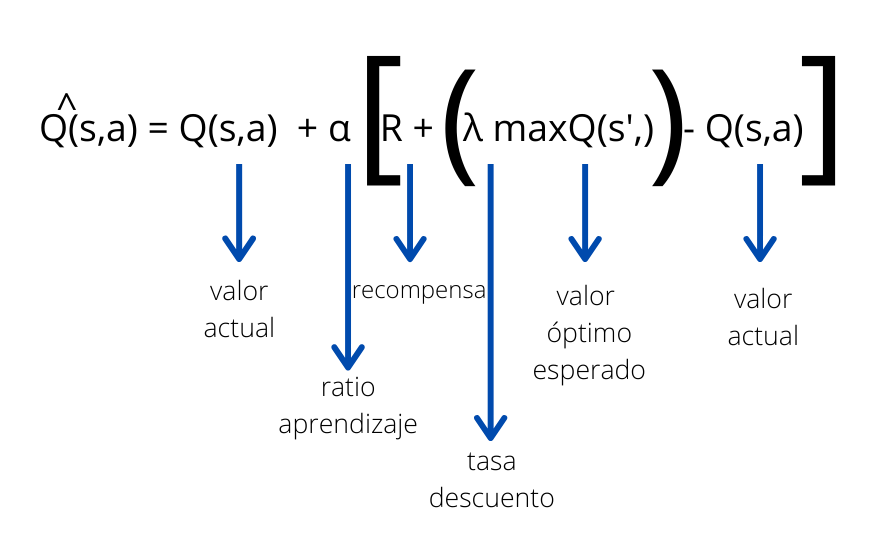

#### Actualiza las políticas Q^(s,a) en base al valor actual más una futura recompensa que recibiremos, en caso de tomar dicha acción. 
#### Hay dos ratios que afectan a la manera en que influye esa recompensa: 
El ratio de aprendizaje, que regula “la velocidad” en la que se aprende, y la “tasa de descuento” que tendrá en cuenta la recompensa a corto o largo plazo.

# Ejercicio Python de RL: Pong con Matplotlib

El agente será el “player 1” y sus acciones posible son 2:

mover hacia arriba
mover hacia abajo
Y las reglas del juego:

El agente tiene 3 vidas.
Si pierde… castigo, restamos 10 puntos.
Cada vez que le demos a la bola, recompensa, sumamos 10.
Para que no quede jugando por siempre, limitaremos el juego a
3000 iteraciones máximo ó
alcanzar 1000 puntos y habremos ganado.

In [2]:
# Importamos las librerias correspondientes para la creacion del juego 
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from time import sleep
from IPython.display import clear_output
from math import ceil,floor

%matplotlib inline

#### La clase Agente
Dentro de la clase Agente encontraremos la tabla donde iremos almacenando las políticas. En nuestro caso la tabla cuenta de 3 coordenadas:

La posición actual del jugador.
La posición “y” de la pelota.
La posición en el eje “x” de la pelota.
Además en esta clase, definiremos el factor de descuento, el learning rate y el ratio de exploración.

Los métodos más importantes:

get_next_step():
decide la siguiente acción a tomar en base al ratio de exploración si tomar “el mejor paso” que tuviéramos almacenado ó tomar un paso al azar, dando posibilidad a explorar el ambiente
update():
Aquí se actualizan las políticas mediante la ecuación de Bellman que vimos anteriormente. Es su implementación en python.

In [3]:
class PongAgent:
    
    def __init__(self, game, policy=None, discount_factor = 0.1, learning_rate = 0.1, ratio_explotacion = 0.9):

        # Creamos la tabla de politicas
        if policy is not None:
            self._q_table = policy
        else:
            position = list(game.positions_space.shape)
            position.append(len(game.action_space))
            self._q_table = np.zeros(position)
        
        self.discount_factor = discount_factor
        self.learning_rate = learning_rate
        self.ratio_explotacion = ratio_explotacion

    def get_next_step(self, state, game):
        
        # Damos un paso aleatorio...
        next_step = np.random.choice(list(game.action_space))
        
        # o tomaremos el mejor paso...
        if np.random.uniform() <= self.ratio_explotacion:
            # tomar el maximo
            idx_action = np.random.choice(np.flatnonzero(
                    self._q_table[state[0],state[1],state[2]] == self._q_table[state[0],state[1],state[2]].max()
                ))
            next_step = list(game.action_space)[idx_action]

        return next_step

    # actualizamos las politicas con las recompensas obtenidas
    def update(self, game, old_state, action_taken, reward_action_taken, new_state, reached_end):
        idx_action_taken =list(game.action_space).index(action_taken)

        actual_q_value_options = self._q_table[old_state[0], old_state[1], old_state[2]]
        actual_q_value = actual_q_value_options[idx_action_taken]

        future_q_value_options = self._q_table[new_state[0], new_state[1], new_state[2]]
        future_max_q_value = reward_action_taken  +  self.discount_factor*future_q_value_options.max()
        if reached_end:
            future_max_q_value = reward_action_taken #maximum reward

        self._q_table[old_state[0], old_state[1], old_state[2], idx_action_taken] = actual_q_value + \
                                              self.learning_rate*(future_max_q_value -actual_q_value)
    
    def print_policy(self):
        for row in np.round(self._q_table,1):
            for column in row:
                print('[', end='')
                for value in column:
                    print(str(value).zfill(5), end=' ')
                print('] ', end='')
            print('')
            
    def get_policy(self):
        return self._q_table
      
      

#### La clase Environment
En la clase de Ambiente encontramos implementada la lógica y control del juego del pong. Se controla que la pelotita rebote, que no se salga de la pantalla y se encuentran los métodos para graficar y animar en matplotlib.

Por Defecto se define una pantalla de 40 pixeles x 50px de alto y si utilizamos la variable “movimiento_px = 5” nos quedará definida nuestra tabla de políticas en 8 de alto y 10 de ancho (por hacer 40/5=8 y 50/5=10). Estos valores se pueden modificar a gusto

Además, muy importante, tenemos el control de cuándo dar las recompensas y penalizaciones, al perder cada vida y detectar si el juego a terminado

In [4]:
class PongEnvironment:
    
    def __init__(self, max_life=3, height_px = 40, width_px = 50, movimiento_px = 3):
        
        self.action_space = ['Arriba','Abajo']
        
        self._step_penalization = 0
        
        self.state = [0,0,0]
        
        self.total_reward = 0
        
        self.dx = movimiento_px
        self.dy = movimiento_px
        
        filas = ceil(height_px/movimiento_px)
        columnas = ceil(width_px/movimiento_px)
        
        self.positions_space = np.array([[[0 for z in range(columnas)] 
                                                  for y in range(filas)] 
                                                     for x in range(filas)])

        self.lives = max_life
        self.max_life=max_life
        
        self.x = randint(int(width_px/2), width_px) 
        self.y = randint(0, height_px-10)
        
        self.player_alto = int(height_px/4)

        self.player1 = self.player_alto  # posic. inicial del player
        
        self.score = 0
        
        self.width_px = width_px
        self.height_px = height_px
        self.radio = 2.5

    def reset(self):
        self.total_reward = 0
        self.state = [0,0,0]
        self.lives = self.max_life
        self.score = 0
        self.x = randint(int(self.width_px/2), self.width_px) 
        self.y = randint(0, self.height_px-10)
        return self.state

    def step(self, action, animate=False):
        self._apply_action(action, animate)
        done = self.lives <=0 # final
        reward = self.score
        reward += self._step_penalization
        self.total_reward += reward
        return self.state, reward , done

    def _apply_action(self, action, animate=False):
        
        if action == "Arriba":
            self.player1 += abs(self.dy)
        elif action == "Abajo":
            self.player1 -= abs(self.dy)
            
        self.avanza_player()

        self.avanza_frame()

        if animate:
            clear_output(wait=True);
            fig = self.dibujar_frame()
            plt.show()

        self.state = (floor(self.player1/abs(self.dy))-2, floor(self.y/abs(self.dy))-2, floor(self.x/abs(self.dx))-2)
    
    def detectaColision(self, ball_y, player_y):
        if (player_y+self.player_alto >= (ball_y-self.radio)) and (player_y <= (ball_y+self.radio)):
            return True
        else:
            return False
    
    def avanza_player(self):
        if self.player1 + self.player_alto >= self.height_px:
            self.player1 = self.height_px - self.player_alto
        elif self.player1 <= -abs(self.dy):
            self.player1 = -abs(self.dy)

    def avanza_frame(self):
        self.x += self.dx
        self.y += self.dy
        if self.x <= 3 or self.x > self.width_px:
            self.dx = -self.dx
            if self.x <= 3:
                ret = self.detectaColision(self.y, self.player1)

                if ret:
                    self.score = 10
                else:
                    self.score = -10
                    self.lives -= 1
                    if self.lives>0:
                        self.x = randint(int(self.width_px/2), self.width_px)
                        self.y = randint(0, self.height_px-10)
                        self.dx = abs(self.dx)
                        self.dy = abs(self.dy)
        else:
            self.score = 0

        if self.y < 0 or self.y > self.height_px:
            self.dy = -self.dy

    def dibujar_frame(self):
        fig = plt.figure(figsize=(5, 4))
        a1 = plt.gca()
        circle = plt.Circle((self.x, self.y), self.radio, fc='slategray', ec="black")
        a1.set_ylim(-5, self.height_px+5)
        a1.set_xlim(-5, self.width_px+5)

        rectangle = plt.Rectangle((-5, self.player1), 5, self.player_alto, fc='gold', ec="none")
        a1.add_patch(circle);
        a1.add_patch(rectangle)
        #a1.set_yticklabels([]);a1.set_xticklabels([]);
        plt.text(4, self.height_px, "SCORE:"+str(self.total_reward)+"  LIFE:"+str(self.lives), fontsize=12)
        if self.lives <=0:
            plt.text(10, self.height_px-14, "GAME OVER", fontsize=16)
        elif self.total_reward >= 1000:
            plt.text(10, self.height_px-14, "YOU WIN!", fontsize=16)
        return fig

#### El juego: Simular miles de veces para enseñar
Finalmente definimos una función para jugar, donde indicamos la cantidad de veces que queremos iterar la simulación del juego e iremos almacenando algunas estadísticas sobre el comportamiento del agente, si mejora el puntaje con las iteraciones y el máximo puntaje alcanzado.

In [5]:
def play(rounds=5000, max_life=3, discount_factor = 0.1, learning_rate = 0.1,
         ratio_explotacion=0.9,learner=None, game=None, animate=False):

    if game is None:
        # si usamos movimiento_px = 5 creamos una tabla de politicas de 8x10
        # si usamos movimiento_px = 3 la tabla sera de 14x17
        game = PongEnvironment(max_life=max_life, movimiento_px = 3)
        
    if learner is None:
        print("Begin new Train!")
        learner = PongAgent(game, discount_factor = discount_factor,learning_rate = learning_rate, ratio_explotacion= ratio_explotacion)

    max_points= -9999
    first_max_reached = 0
    total_rw=0
    steps=[]

    for played_games in range(0, rounds):
        state = game.reset()
        reward, done = None, None
        
        itera=0
        while (done != True) and (itera < 3000 and game.total_reward<=1000):
            old_state = np.array(state)
            next_action = learner.get_next_step(state, game)
            state, reward, done = game.step(next_action, animate=animate)
            if rounds > 1:
                learner.update(game, old_state, next_action, reward, state, done)
            itera+=1
        
        steps.append(itera)
        
        total_rw+=game.total_reward
        if game.total_reward > max_points:
            max_points=game.total_reward
            first_max_reached = played_games
        
        if played_games %500==0 and played_games >1 and not animate:
            print("-- Partidas[", played_games, "] Avg.Puntos[", int(total_rw/played_games),"]  AVG Steps[", int(np.array(steps).mean()), "] Max Score[", max_points,"]")
                
    if played_games>1:
        print('Partidas[',played_games,'] Avg.Puntos[',int(total_rw/played_games),'] Max score[', max_points,'] en partida[',first_max_reached,']')
        
    #learner.print_policy()
    
    return learner, game

#### Para entrenar ejecutamos la función con los siguientes parámetros:

6000 partidas jugará
ratio de explotación: el 85% de las veces será avaro, pero el 15% elige acciones aleatorias, dando lugar a la exploración.
learning rate = se suele dejar en el 10 por ciento como un valor razonable, dando lugar a las recompensas y permitiendo actualizar la importancia de cada acción poco a poco. Tras más iteraciones, mayor importancia tendrá esa acción.
discount_factor = También se suele empezar con valor de 0.1 pero aquí utilizamos un valor del 0.2 para intentar indicar al algoritmo que nos interesa las recompensas a más largo plazo.

In [6]:
learner, game = play(rounds=6000, discount_factor = 0.2, learning_rate = 0.1, ratio_explotacion=0.85)

Begin new Train!
-- Partidas[ 500 ] Avg.Puntos[ 16 ]  AVG Steps[ 224 ] Max Score[ 110 ]
-- Partidas[ 1000 ] Avg.Puntos[ 23 ]  AVG Steps[ 248 ] Max Score[ 140 ]
-- Partidas[ 1500 ] Avg.Puntos[ 25 ]  AVG Steps[ 254 ] Max Score[ 140 ]
-- Partidas[ 2000 ] Avg.Puntos[ 27 ]  AVG Steps[ 261 ] Max Score[ 250 ]
-- Partidas[ 2500 ] Avg.Puntos[ 28 ]  AVG Steps[ 265 ] Max Score[ 250 ]
-- Partidas[ 3000 ] Avg.Puntos[ 29 ]  AVG Steps[ 270 ] Max Score[ 310 ]
-- Partidas[ 3500 ] Avg.Puntos[ 33 ]  AVG Steps[ 282 ] Max Score[ 310 ]
-- Partidas[ 4000 ] Avg.Puntos[ 34 ]  AVG Steps[ 286 ] Max Score[ 310 ]
-- Partidas[ 4500 ] Avg.Puntos[ 35 ]  AVG Steps[ 290 ] Max Score[ 310 ]
-- Partidas[ 5000 ] Avg.Puntos[ 36 ]  AVG Steps[ 293 ] Max Score[ 370 ]
-- Partidas[ 5500 ] Avg.Puntos[ 37 ]  AVG Steps[ 298 ] Max Score[ 370 ]
Partidas[ 5999 ] Avg.Puntos[ 39 ] Max score[ 370 ] en partida[ 4649 ]


Ya contamos con nuestro agente entrenado, ahora veamos qué tal se comporta en una partida de pong, y lo podemos ver jugar, pasando el parámetro animate=True.

Antes de jugar, instanciamos un nuevo agente “learner2” que utilizará las políticas que creamos anteriormente. A este agente le seteamos el valor de explotación en 1, para evitar que tome pasos aleatorios.

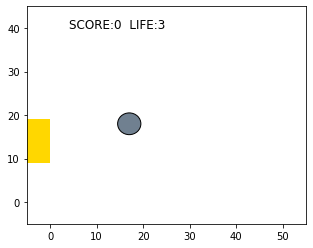

In [ ]:
learner2 = PongAgent(game, policy=learner.get_policy())
learner2.ratio_explotacion = 1.0  # con esto quitamos las elecciones aleatorias al jugar
player = play(rounds=1, learner=learner2, game=game, animate=True)